In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio
%matplotlib inline

In [2]:
def gen(f):
    duration = 1
    y = np.sin(f * 2 * np.pi * np.linspace(0, duration, 44100 * duration))  # * np.linspace(0, 1, 44100 * duration)
    return y

In [3]:
y = gen(440)
display(Audio(y, rate=44100))

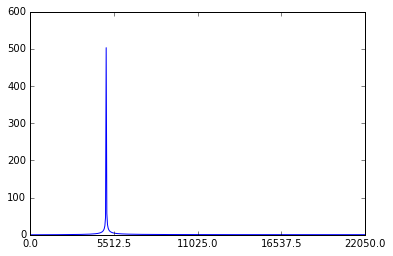

(158.872339035+477.221577622j) (-18.3956339461-54.6382958635j) 502.972021347 0.03125859146


In [4]:
y = gen(5000)
D = np.fft.fft(y[:1024])
plt.plot(np.abs(D))
plt.xlim(0, 1024 / 2)
plt.xticks(np.linspace(0, 1024 / 2, 5), np.linspace(0, 44100 / 2, 5))
plt.show()

print(D.max(), D.min(), np.abs(D).max(), np.abs(D).min())